## Jay Chou Lyrics Common Terms

In [43]:
from collections import Counter
import jieba
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, 'modules/')

from fintextmin import *  # 使用 modules 中的 fintextmin 模組

In [44]:
text_list = read_text_folder("./dataset/")
print("document number:", len(text_list))

document number: 7


### 製作詞頻矩陣

下面以 Python 實現製作詞頻矩陣的步驟，並附上對應的fintextmin函式

In [45]:
## [原生 python 寫法]
doc_names = range(len(text_list))
dwc = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in zip(doc_names, text_list)}


## [使用 fintextmin 模組]
# stopwords = [] 
# dwc = count_words_in_documents(doc_list = text_list,
#                               doc_names = range(len(text_list)),
#                                stopwords = stopwords)

In [46]:
## [原生 python 寫法] 
restricted_terms = ['的']
doc_word_frequency = {key: {i:Counter(doc)[i] for i in Counter(doc) if len(i) >= 2} for key, doc in dwc.items()}
list(doc_word_frequency[0].items())[0:10] # 顯示第一篇文章的部份詞彙與對應詞頻

## [使用 fintextmin 寫法]
# doc_word_frequency = create_word_frequency_matrix(dwc)

[('從前', 1),
 ('貓頭鷹', 1),
 ('屋頂', 1),
 ('頂後面', 1),
 ('一片', 1),
 ('森林', 2),
 ('很安靜安靜', 1),
 ('鋼琴', 1),
 ('大廳', 1),
 ('樓裡', 1)]

In [47]:
## [原生 python 寫法] 
dwf_list = [pd.DataFrame(list(doc.values()), index=doc.keys()) for doc in doc_word_frequency.values()]
wfm = pd.concat(dwf_list, axis=1)
wfm = np.transpose(wfm).fillna(0)
wfm.index = doc_word_frequency.keys()

puncs = set_puncs() # 因為一開始沒有清除標點符號,這邊回過頭來將它們自矩陣移除
wfm = wfm[list(set(wfm) - set(puncs))]
wfm # 詞頻矩陣完成

## [使用 fintextmin 寫法]
# wfm = create_word_frequency_matrix(dwc)

/home/aesophor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,床邊,從前,親愛的,簡單,起過,音樂盒,頂後面,嘟嘟,太擁,懷抱,...,過雲層,過的,小指,細細,大廳,好好,退禮物,一切,眼睜睜,名字
0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2,0.0,0.0,0.0,8.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0
4,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 製作TF-IDF矩陣

可以將完成後的tf-idf矩陣與上面的詞頻矩陣比較一下係數

In [48]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer

## [原生 python 寫法] 
transformer = TfidfTransformer()
tfidf_gen = transformer.fit_transform(wfm) # 產生一個 tfidf 矩陣的 generator
df_tfidf = pd.DataFrame(tfidf_gen.toarray(), columns=wfm.columns)
df_tfidf

## [使用 fintextmin 寫法]
# df_tfidf = evaluate_tfidf(wfm)

,床邊,從前,親愛的,簡單,起過,音樂盒,頂後面,嘟嘟,太擁,懷抱,...,過雲層,過的,小指,細細,大廳,好好,退禮物,一切,眼睜睜,名字
0,0.086506,0.043253,0.000000,0.0000,0.000000,0.043253,0.043253,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.086506,0.000000,0.043253,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.135285,0.000000
2,0.000000,0.000000,0.000000,0.1899,0.000000,0.000000,0.000000,0.023738,0.000000,0.000000,...,0.047475,0.023738,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.409108,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.136369,0.136369,0.000000,0.136369
4,0.000000,0.000000,0.000000,0.0000,0.096757,0.000000,0.000000,0.000000,0.096757,0.000000,...,0.000000,0.000000,0.000000,0.096757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.074434,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.101518,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### 視覺化TFIDF和原本詞頻矩陣的差異

這邊我們取第一篇文章來比較看看調整前後的詞彙係數

In [49]:
first_text = wfm.to_dict(orient='records')[0] # 將詞頻矩陣轉換成dictionary型別, 把第一篇文章抽出來
list(first_text.items())[0:10] # 檢視一下轉換結果

[('床邊', 2.0),
 ('從前', 1.0),
 ('親愛的', 0.0),
 ('簡單', 0.0),
 ('起過', 0.0),
 ('音樂盒', 1.0),
 ('頂後面', 1.0),
 ('嘟嘟', 0.0),
 ('太擁', 0.0),
 ('懷抱', 0.0)]

## 文字雲

/home/aesophor/anaconda3/lib/python3.7/site-packages/wordcloud/wordcloud.py:464: RuntimeWarning: invalid value encountered in double_scalars
  font_size = int(round((rs * (freq / float(last_freq))


ValueError: cannot convert float NaN to integer

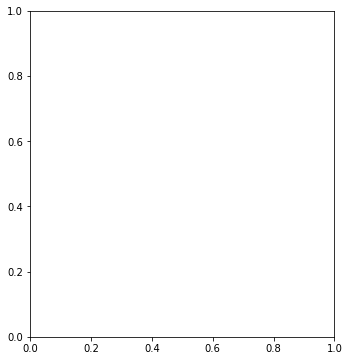

In [50]:
linux_font = r'/usr/share/fonts/wqy-zenhei/wqy-zenhei.ttc'

plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121)
plot_wordcloud(first_text, ax=ax1, font_path=linux_font, height=300, width=300)

ax2 = plt.subplot(122)
plot_tfidf_wordcloud(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, height=300, width=300)

## 長條圖

可以發現，經過TF-IDF處理之後，比較重要的詞彙被突顯出來。

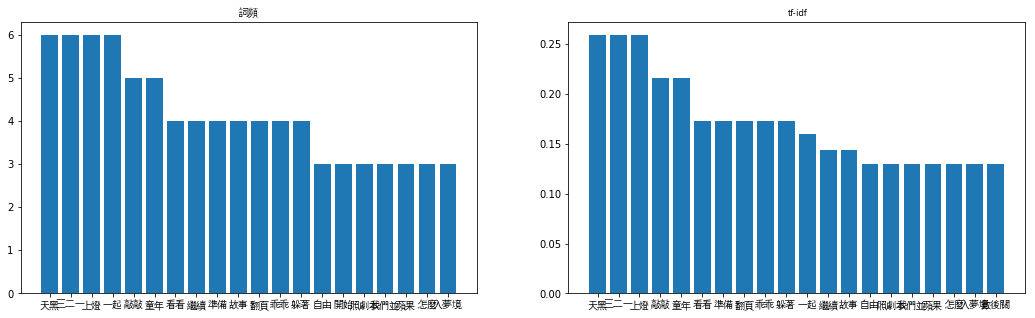

In [51]:
plt.figure(figsize=(18, 5))
ax1 = plt.subplot(121)
plot_tf_bar(first_text, ax=ax1, font_path=linux_font, title="詞頻")

ax2 = plt.subplot(122)
plot_tfidf_bar(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, title="tf-idf")